<br/>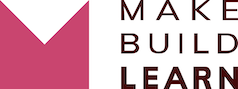<br/><br/>
<center style="color:#888">Visualización de datos</center>
<center style="color:#aaa; margin-top:10px;"><b>Prof. Óscar Fernández Angulo</b><br>oscarfa@faculty.mioti.es</center>
<p style="font-size: 2.5em; text-align:center">Challenge S3: Atletas olímpicos</p><br/>

# Consideraciones previas

* Cada ejercicio se responderá con una sola figura y, si se considera necesario, un texto comentando los resultados.
* No existe una única respuesta correcta. 
* Se valorará positivamente usar diferentes típos de gráficos durante el Challenge. Si no se repite ninguno, mejor.
* Los ejercicios están pensados para responderse con los conocimientos obtenidos en cualquiera de los Worksheets presentados hasta la fecha.

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import datetime
import math
from scipy import stats


# Seleccionamos un tamaño de letra que se pueda leer.
matplotlib.rcParams.update({'font.size': 14})

Para este Challenge vamos a utilizar el dataset [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). En donde se almacena un historico de los resultados que han obtenido los atletas que han participado en las olimpiadas.

In [2]:
# Cargamos el csv en Pandas.
athlete_df = pd.read_csv("./athlete_events.csv")

# Mostramos una muestra.
athlete_df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
55897,28645,Pavol Dindk,M,21.0,NaN,NaN,Czechoslovakia,TCH,1992 Summer,1992,Summer,Barcelona,Water Polo,Water Polo Men's Water Polo,NaN
109025,55125,Magne Johansen,M,27.0,NaN,NaN,Norway,NOR,1992 Winter,1992,Winter,Albertville,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
118669,60041,Kim Ji-Hoon,M,31.0,179.0,75.0,South Korea,KOR,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Men's Two Person Dinghy,NaN
235447,118050,Naomi Takewaki,M,23.0,182.0,83.0,Japan-1,JPN,1988 Winter,1988,Winter,Calgary,Bobsleigh,Bobsleigh Men's Two,NaN
142979,71751,Deborah Esther Ainslie Lovely (-Acason),F,21.0,170.0,94.0,Australia,AUS,2004 Summer,2004,Summer,Athina,Weightlifting,Weightlifting Women's Heavyweight,NaN


In [3]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


# Ejercicio 1
¿Qué edad suelen tener los atletas olímpicos?

In [3]:
def plot_age_histogram(df, bins=15):
    fig, ax = plt.subplots(figsize=(14, 7))
    # Representamos el histograma.
    ax.hist(df['Age'], bins=bins)
    ax.set_xticks(bins)
    ax.set_xticklabels(bins, rotation=35, ha='right')
    
    ax.grid(True, axis='y')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
 #   ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xlabel('Age')
    ax.set_ylabel('Number of athletes')
    return fig,ax

In [4]:
# Establecemos el número de bins conforme a calcular la edad mínima y máxima y la vamos segementado de 5 años en 5 años
# Es configurable, contra más salto se de menos detalle en el histograma
bin_age=np.arange(int(athlete_df['Age'].min()),int(athlete_df['Age'].max()),5)

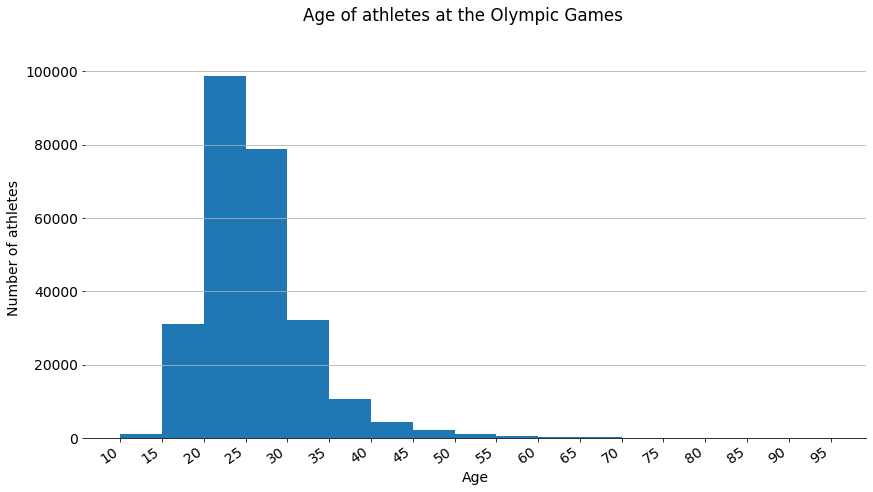

In [5]:
fig,ax=plot_age_histogram(athlete_df,bin_age)

fig.suptitle("Age of athletes at the Olympic Games");

# Ejercicio 2
Nos gustaría conocer los paíes que han ganado más medallas a lo largo de la historia. Además, querríamos saber cuantas han sido en juegos de invierno y cuantas en juegos de verano.

In [6]:
def plot_country_medals_2(df,title=None,x_label=None,y_label=None,legend_label=None):
    
# Obtenemos las columnas a representar.
    paises = df['Team']
    invierno =df['Winter']
    verano = df['Summer']
    total = df['Total']
    
      # Instanciamos la figura.
    fig, ax = plt.subplots(figsize=(16, 7))
    
    # Representamos las líneas.
    width = 0.65
    verano_ax = ax.bar(paises, verano, width, label='Summer',color='Orange')
    invierno_ax = ax.bar(paises, invierno, width, bottom=verano,
       label='Winter',color='steelblue')
    
    ax.set_xticks(paises)
    ax.set_xticklabels(paises, rotation=35, ha='right')
        
 # Añadimos unas guías verticales.
    ax.grid(True, axis='y')
    
 # Añadimos la leyenda.    
    ax.legend(loc='center left',bbox_to_anchor=(1.01, 0.5), title='Olympics')

    # Ocultamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
  #  ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
 # Etiquetamos el eje X.
    ax.set_ylabel('Number of medals')
    ax.set_xlabel('Country')
    for index,data in enumerate(total):
        ax.text(x=index,y=data, s="%d\n"%(data) , ha='center', va='bottom' ,fontdict=dict(fontsize=11))
    
  
    return fig, ax

In [7]:
country_medals_df=athlete_df[~athlete_df['Medal'].isna()]

country_medals_df = pd.pivot_table(country_medals_df, values='Medal', index=['Team'],
                      columns=['Season'],aggfunc='count').fillna(0)
country_medals_df['Total'] = country_medals_df['Summer']+country_medals_df['Winter']
country_medals_df.sort_values(by='Total',ascending=False, inplace=True)
country_medals_df=country_medals_df.iloc[:25,0:3]
country_medals_df.reset_index(inplace=True)
country_medals_df


Season,Team,Summer,Winter,Total
0,United States,4686.0,533.0,5219.0
1,Soviet Union,2061.0,390.0,2451.0
2,Germany,1687.0,297.0,1984.0
3,Great Britain,1598.0,75.0,1673.0
4,France,1408.0,142.0,1550.0
5,Italy,1384.0,143.0,1527.0
6,Sweden,1006.0,428.0,1434.0
7,Australia,1290.0,16.0,1306.0
8,Canada,668.0,575.0,1243.0
9,Hungary,1123.0,4.0,1127.0


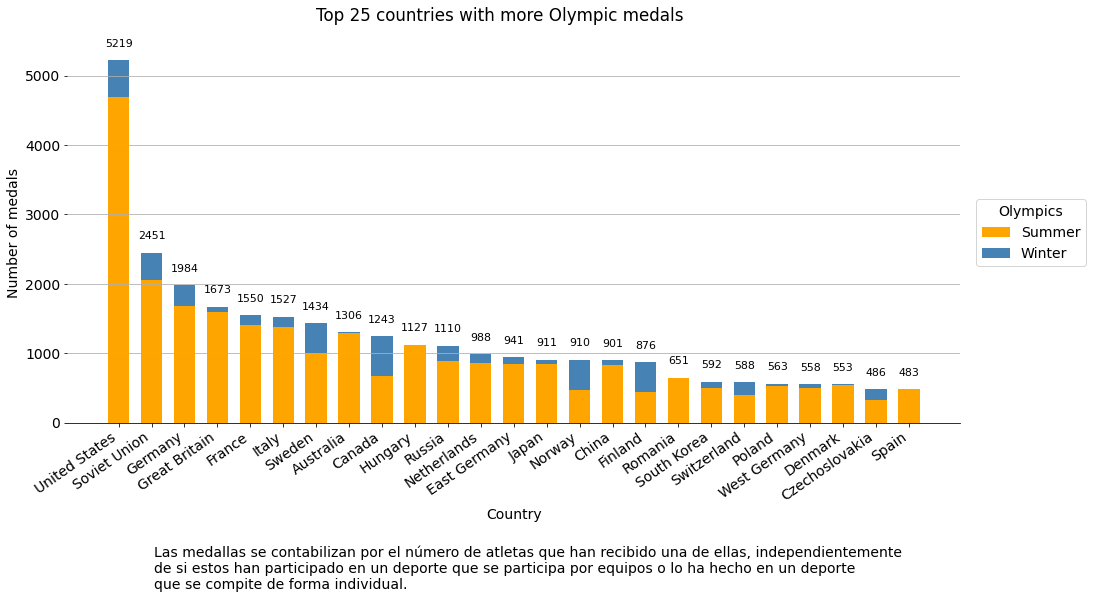

In [8]:
# Cada línea es la participación de un ateta en una prueba.
# Seleccionamos los que han recibido medalla.
country_medals_df=athlete_df[~athlete_df['Medal'].isna()]

country_medals_df = pd.pivot_table(country_medals_df, values='Medal', index=['Team'],
                      columns=['Season'],aggfunc='count').fillna(0)
country_medals_df['Total'] = country_medals_df['Summer']+country_medals_df['Winter']
country_medals_df.sort_values(by='Total',ascending=False, inplace=True)
country_medals_df=country_medals_df.iloc[:25,0:3]
country_medals_df.reset_index(inplace=True)

# Llamamos a la función que montaran la gráfica
fig,ax=plot_country_medals_2(country_medals_df)

#Establecemo el título
titulo = 'Top '+ "%d"%(country_medals_df.shape[0]) + ' countries with more Olympic medals'
fig.suptitle(titulo, y=.95);

# Inlcuimos un caption explicando alguna cuestión sobre los datos
caption = """Las medallas se contabilizan por el número de atletas que han recibido una de ellas, independientemente
de si estos han participado en un deporte que se participa por equipos o lo ha hecho en un deporte
que se compite de forma individual."""
fig.text(0.2, -0.2, caption, wrap=True);
   


# Ejercicio 3
Nos gustaría conocer en qué deportes son más pesados los atletas y, además, cuanto suelen pesar los hombres y las mujeres que compiten en esos deportes.

In [9]:
def plot_sport_weight(df):
    
    lines=[]
    lines_legend=[]
    color = plt.get_cmap('tab10')
    find_line_male_bl=False
    find_line_female_bl=False

    #weight_athlete_df=df[~athlete_df['Weight'].isna()]
    
    # Seleccionamos los 20 primeros deportes cuya media de peso es mayor e intervienen más de un atleta con peso registrado
    sport_list=df.groupby('Sport')['Weight'].aggregate(['mean','count']).sort_values(by=['mean','count'],ascending=False)
    sport_list=sport_list[sport_list['count']>1][:20].index
    
    fig, ax = plt.subplots(5, 4, figsize=(16, 12), sharex=False, sharey=True)
    
    for i in range(0, 5):
        for j in range(0, 4):
            indexed_ax = ax[i][j]
            lines=lines+plot_weight_athlete(df,sport_list[i*4 + j],indexed_ax,color)

    # Ponemos el título a la figura.
    
    fig.suptitle("Weight of athletes")
    
    # Añadimos la etiqueta de la escala vertical.
    fig.text(0.02, 0.5, 'Densidad', rotation='vertical', verticalalignment='center', font={'size':18})
    
    # Añadimos la etiqueta de la escala horizontal.
    fig.text(0.5, 0.02, 'Peso', rotation='horizontal', font={'size':18})
    
    #Ajustamos espacio entre los subplots
    fig.subplots_adjust(hspace=1.5)
    
    # Extraemos una linea de cada clase, para establecer una legend con cada una de las clases representadas
    # en este caso Hombre y Mujer. Si no hicieramos esta selección al pasarle a fig todas las lineas de los 
    # diferentes subplots, siempre se queda con las dos primeras lineas pintadas. Por lo que como en este caso las dos
    # primeras correspondían a lienas de datos de hombre siempre pintaba la leyenda del color co el que se indetifca
    # a los hombres. Ha costado un poco descubrir este comportamiento ...
    
    for i in range(len(lines)):
        
        if ((lines[i].get_label()=='Hombre')& (not find_line_male_bl)):
                    lines_legend.extend([lines[i]])
                    find_line_male_bl=True

        elif ((lines[i].get_label()=='Mujer')& (not find_line_female_bl)):
                    lines_legend.extend([lines[i]])
                    find_line_female_bl=True
     
    #Establecemos la leyenda a nivel de la figura.
    fig.legend(lines_legend,['Hombre','Mujer'],labelcolor=[color.colors[0],color.colors[1]],frameon=True, loc='center left', bbox_to_anchor=(0.99, 0.5))

    return fig, ax

In [10]:
def plot_weight_athlete(df,sport,ax,color):
    
    #Lista donde se guardaran los objetos Line2d para poder poner la leyenda en el fig
    lista=[]
   
    # Instanciamos el valor de la X.
    x = np.arange(20, 150, 0.01)
    
    #Seleccionamos los datos para hombres y mujers del deporte que se nos pasa como parámetro.
    male_weight_df = df[(athlete_df['Sport']==sport)&(df['Sex']=='M')]
    female_weight_df = df[(athlete_df['Sport']==sport)&(df['Sex']=='F')]
    
    #Eliminamos los registros que no tienen informado el peso.
    male_weight_df = male_weight_df['Weight'].dropna()
    female_weight_df = female_weight_df['Weight'].dropna()

    
    if (male_weight_df.shape[0]>0):
       
        # Estimamos la función de densidad de los hombres.
        male_weight_density_function = stats.kde.gaussian_kde(male_weight_df)
        male_weight_y = male_weight_density_function(x)
     
        # Representamos la curva de los hombres.
        lineh=ax.plot(x, male_weight_y, label="Hombre", color=color.colors[0] )[0]
        ax.fill_between(x, male_weight_y, color=color.colors[0], alpha=0.5)
        lista.append(lineh)

    if (female_weight_df.shape[0]>1):

         # Estimamos la función de densidad de las mujeres.
        female_weight_density_function = stats.kde.gaussian_kde(female_weight_df)
        # Calculamos la Y.
       
        female_weight_y = female_weight_density_function(x)
        
        # Representamos la de las mujeres.
        linem=ax.plot(x, female_weight_y, label="Mujer",color=color.colors[1])[0]
        ax.fill_between(x, female_weight_y,color=color.colors[1], alpha=0.5)
        lista.append(linem)
    
    # Establecemos grid
    ax.grid(True, axis='y')

    # Desactivamos los bordes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
#     ax.legend()
#     ax.set_xlabel('Peso')
#     ax.set_ylabel('Densidad')

    # Establecemos como titulo el nombre del deporte
    ax.set_title(sport,font={'size':12})
     
    
    return lista

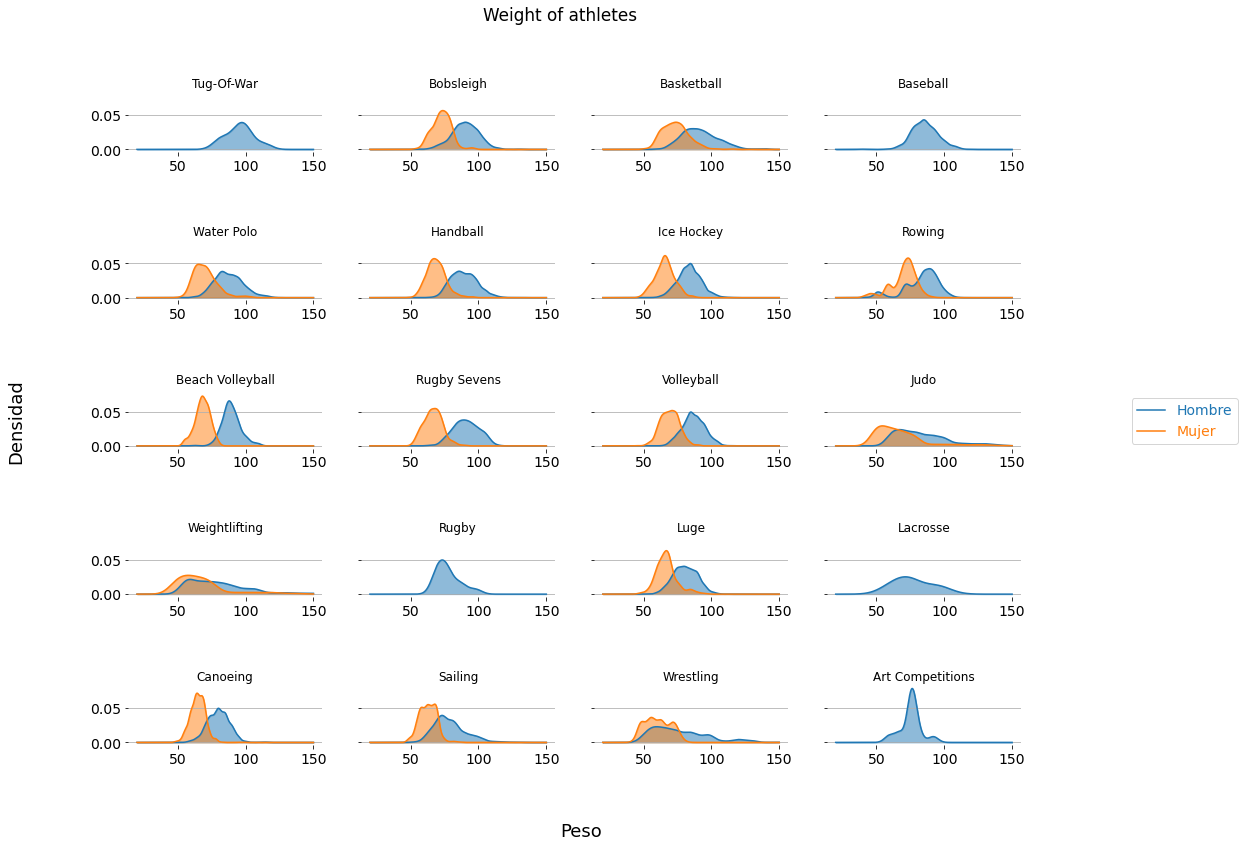

In [11]:
plot_sport_weight(athlete_df);

# Ejercicio 4
Nos gustaría saber si son más populares los juegos olimpicos de invierno o de verano. Es decir, participan más atletas en los juegos olímpicos de verano o en los de inviernos. Y si son estas participaciones uniformes.

In [12]:
def popular_olimpic_games(df):
    
    fig, ax = plt.subplots(figsize=(16, 8))
    

    # Por cada tipo de juego olimpico añadiremos una linea.
    ax.plot(df['Summer'], label='Summer', linewidth=3)
    ax.plot(df['Winter'], label='Winter', linewidth=3)

    #Etiquetamos los ejes x e y
    ax.set_ylabel('Number of Athletes')
   # ax.set_xlabel('Year')

    # Añadimos la leyenda.    
    ax.legend(loc='center left',bbox_to_anchor=(1.01, 0.5), title='Types of Olympic')
    
    # Activamos la visualización de la rejilla
    ax.grid(True)

    # Eliminamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    return fig, ax

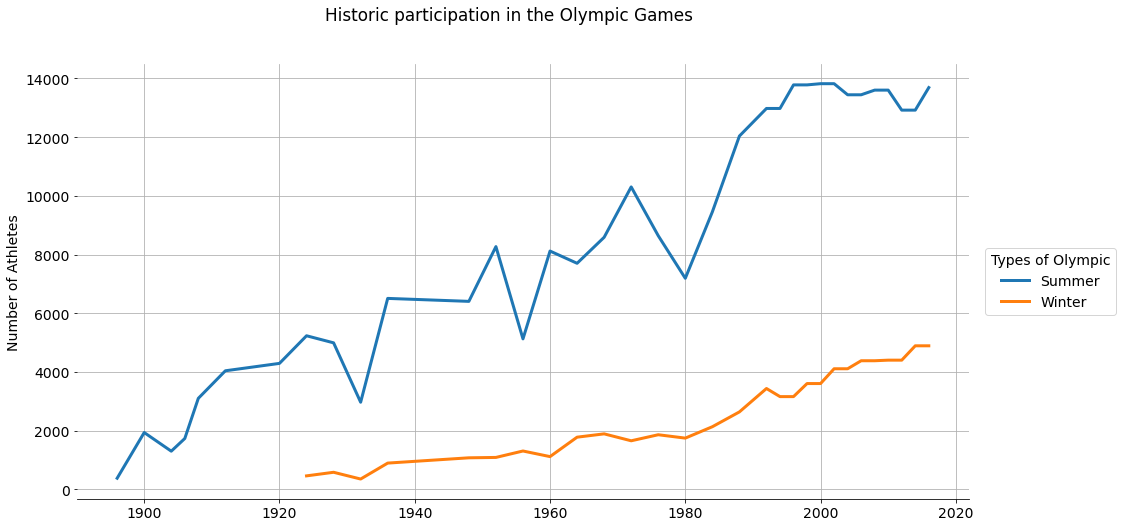

In [13]:
popular_og_df = pd.pivot_table(athlete_df, values='ID', index=['Year'],
                       columns=['Season'],aggfunc='count').fillna(method='ffill')

fig, ax = popular_olimpic_games(popular_og_df)

# Etiquetamos la figura.
fig.suptitle('Historic participation in the Olympic Games');


# Ejercicio 5
Cuántas medallas de cada tipo (oro, plata y bronce) se suelen llevar los españoles en los juegos olímpicos de verano.

In [14]:
#Obtenemos los datos del equipo español en el que se haya obtenido alguna medalla y el tipo de juego sea de verano.
spain_medals_df = athlete_df[(~athlete_df['Medal'].isna()) & (athlete_df['Team']=='Spain')& (athlete_df['Season']=='Summer')]


#Ordenamos por año
spain_medals_df=spain_medals_df.sort_values(by='Year',ascending=False)

lista_juegos=(spain_medals_df['City'].map(str) + '-' + spain_medals_df['Year'].map(str)).unique()
lista_juegos=lista_juegos[::-1]

#Montamos una tabla pivotada. Los juegos en donde no se haya conseguido algún tipo de medalla se pondrá un 0
spain_medals_df = pd.pivot_table(spain_medals_df, values='ID', index=['Year'],
                       columns=['Medal'],aggfunc='count').fillna(0)


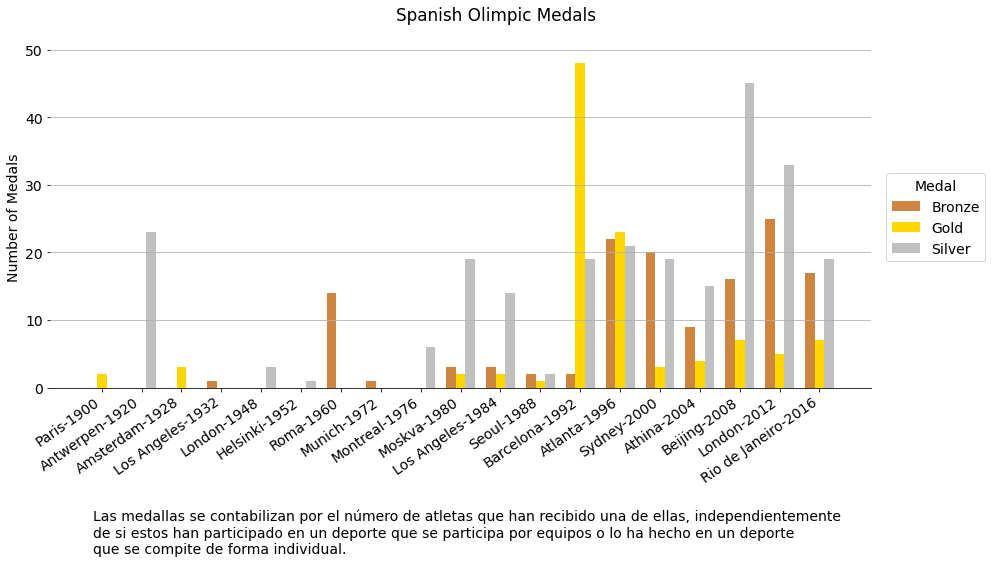

In [15]:
#Preparamos la gráfica

fig, ax = plt.subplots(figsize=(14, 7))

color_scale = pd.Series(data=['Gold','Silver','Peru'],
                       index=['Gold','Silver','Bronze']) 

width = 0.75   
# Calculamos el número de grupos.
number_of_groups = spain_medals_df.shape[0]

# Calculamos el número de barras por grupo.
number_of_bars_per_group = spain_medals_df.shape[1]

# Calculamos la distancia entre los grupos.
distance = width * (number_of_bars_per_group + 1)

# Calculamos la posición de cada grupo en el eje X.
group_x_possition = np.linspace(1, distance * number_of_groups, number_of_groups)

labels=spain_medals_df.index

for i,column in enumerate(spain_medals_df.columns):

    # Calculamos la posición relativa de la barra con respecto al grupo.
           
         relative_position = ((1 - number_of_bars_per_group)/2 + i) * width
        
         ax.bar(
            group_x_possition + relative_position,
            spain_medals_df[column],
            width=width,
            color=color_scale[column],
            label=column
        )
        


# Añadimos la leyenda.    
ax.legend(loc='center left',bbox_to_anchor=(1.01, 0.5), title='Medal')

# Añadimos el titulo a los ejes x e y. Así como a los puntos de las x
ax.set_ylabel('Number of Medals')
#ax.set_xlabel('Game')
ax.set_xticks(group_x_possition)
ax.set_xticklabels(lista_juegos)
ax.set_xticklabels(lista_juegos, rotation=35, ha='right')

# Mostramos la cuadricula.
ax.grid(True, axis='y')

# Ocultamos el marco.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Etiquetamos la figura.
fig.suptitle('Spanish Olimpic Medals')

fig.tight_layout()

caption = """Las medallas se contabilizan por el número de atletas que han recibido una de ellas, independientemente
de si estos han participado en un deporte que se participa por equipos o lo ha hecho en un deporte
que se compite de forma individual."""
fig.text(0.1, -0.1, caption, wrap=True);

plt.show()